In [85]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
import zipfile
import matplotlib.image as mpimg
import seaborn as sns
import random
import os
from zipfile import ZipFile
from skimage.io import imread, imshow
import warnings
warnings.filterwarnings('ignore')

In [86]:
print(os.listdir("../input/dogs-vs-cats"))

['test1.zip', 'train.zip', 'sampleSubmission.csv']


In [87]:
trainDataPath = "/kaggle/input/dogs-vs-cats/train.zip"
testDataPath = "/kaggle/input/dogs-vs-cats/test1.zip"
ZipFile(trainDataPath,mode = "r").extractall()
ZipFile(testDataPath,mode =  "r").extractall()

In [88]:
train_file= './train'
test_file = './test1'

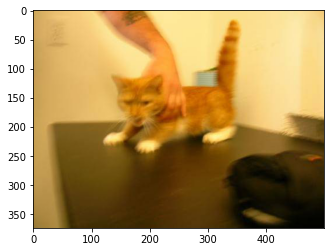

In [89]:
img = load_img(train_file +  '/cat.0.jpg')
plt.imshow(img)

In [90]:
train_list = os.listdir(train_file)
test_list = os.listdir(test_file)

In [91]:
print (train_list[:5])
print (test_list[:5])

['cat.391.jpg', 'cat.9420.jpg', 'dog.8369.jpg', 'cat.10534.jpg', 'cat.9448.jpg']
['4971.jpg', '12476.jpg', '5464.jpg', '12109.jpg', '2259.jpg']


In [92]:
print ('Toplam eğitim veri sayısı:',len(train_list))
print ('Toplam test veri sayısı:',len(test_list))

Toplam eğitim veri sayısı: 25000
Toplam test veri sayısı: 12500


In [93]:
categories = []
for filename in train_list:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

data_frame = pd.DataFrame({ 'filename': train_list, 'category': categories})

In [94]:
data_frame[:15]

,filename,category
0,cat.391.jpg,0
1,cat.9420.jpg,0
2,dog.8369.jpg,1
3,cat.10534.jpg,0
4,cat.9448.jpg,0
5,cat.8797.jpg,0
6,cat.2281.jpg,0
7,cat.9631.jpg,0
8,dog.8651.jpg,1
9,dog.2394.jpg,1


In [95]:
print (categories[:15])

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0]


In [96]:
print (train_list[:15])

['cat.391.jpg', 'cat.9420.jpg', 'dog.8369.jpg', 'cat.10534.jpg', 'cat.9448.jpg', 'cat.8797.jpg', 'cat.2281.jpg', 'cat.9631.jpg', 'dog.8651.jpg', 'dog.2394.jpg', 'dog.881.jpg', 'cat.8692.jpg', 'dog.10196.jpg', 'cat.3603.jpg', 'cat.4431.jpg']


In [97]:
data_frame["category"] = data_frame["category"].replace({0: 'cat', 1: 'dog'}) 

In [98]:
x_train, val_set = train_test_split(data_frame, test_size=0.20, random_state=42)
x_train = x_train.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)

In [99]:
print ('Toplam eğitim veri sayısı:',len(x_train))
print ('Toplam val veri sayısı:',len(val_set))

Toplam eğitim veri sayısı: 20000
Toplam val veri sayısı: 5000


In [100]:
train_class_counts=x_train['category'].value_counts()
print("Train data setimizdeki cat sayısı:{}".format(train_class_counts[0]))
print("Train data setimizdeki dog sayısı:{}".format(train_class_counts[1]))

val_class_counts=val_set['category'].value_counts()
print("Val data setimizdeki cat sayısı:{}".format(val_class_counts[0]))
print("Val data setimizdeki dog sayısı:{}".format(val_class_counts[1]))

Train data setimizdeki cat sayısı:10027
Train data setimizdeki dog sayısı:9973
Val data setimizdeki cat sayısı:2527
Val data setimizdeki dog sayısı:2473


In [101]:
train_rescale=ImageDataGenerator(rescale=1./255)

In [102]:
train_model=train_rescale.flow_from_dataframe(   x_train,
                                                 directory = train_file, 
                                                 x_col='filename',
                                                 y_col='category',
                                                 color_size='rgb',
                                                 target_size=(128,128),
                                                 class_mode='categorical',
                                                 batch_size=64               )

Found 20000 validated image filenames belonging to 2 classes.


In [103]:
val_rescale=ImageDataGenerator(rescale=1./255)

In [104]:
val_model=val_rescale.flow_from_dataframe(       val_set,
                                                 directory = train_file, 
                                                 x_col='filename',
                                                 y_col='category',
                                                 color_size='rgb',
                                                 target_size=(128,128),
                                                 class_mode='categorical',
                                                 batch_size=64                            )

Found 5000 validated image filenames belonging to 2 classes.


In [105]:
model_17=Sequential()

In [106]:
model_17.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model_17.add(MaxPooling2D(pool_size=(2,2)))
model_17.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model_17.add(MaxPooling2D(pool_size=(2,2)))
model_17.add(Dropout(0.25))
model_17.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model_17.add(MaxPooling2D(pool_size=(2,2)))
model_17.add(Dropout(0.25))
model_17.add(Flatten())
model_17.add(Dense(128, activation='relu'))
model_17.add(Dropout(0.5))
model_17.add(Dense(2, activation='sigmoid'))

In [107]:
model_17.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)       

In [108]:
model_17.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [109]:
model_17.optimizer.lr=0.001

In [110]:
callback= EarlyStopping(monitor='val_loss',patience=14, restore_best_weights=True, verbose=1, mode='min')

In [111]:
batch_size=64
epochs=60

In [112]:
history_17= model_17.fit(train_model,
          batch_size=batch_size,
          epochs=epochs,
          shuffle=True,
          verbose=1,
          callbacks= callback, 
          validation_data=val_model
                      )

Epoch 1/60
313/313 [==============================] - 86s 272ms/step - loss: 0.7141 - accuracy: 0.5468 - val_loss: 0.6391 - val_accuracy: 0.6186
Epoch 2/60
313/313 [==============================] - 84s 269ms/step - loss: 0.5824 - accuracy: 0.7008 - val_loss: 0.6048 - val_accuracy: 0.6782
Epoch 3/60
313/313 [==============================] - 85s 270ms/step - loss: 0.5230 - accuracy: 0.7463 - val_loss: 0.5536 - val_accuracy: 0.7168
Epoch 4/60
313/313 [==============================] - 84s 268ms/step - loss: 0.4818 - accuracy: 0.7738 - val_loss: 0.4816 - val_accuracy: 0.7846
Epoch 5/60
313/313 [==============================] - 84s 270ms/step - loss: 0.4372 - accuracy: 0.7984 - val_loss: 0.4016 - val_accuracy: 0.8216
Epoch 6/60
313/313 [==============================] - 84s 268ms/step - loss: 0.4069 - accuracy: 0.8178 - val_loss: 0.4265 - val_accuracy: 0.8066
Epoch 7/60
313/313 [==============================] - 84s 269ms/step - loss: 0.3927 - accuracy: 0.8250 - val_loss: 0.3990 - val_ac

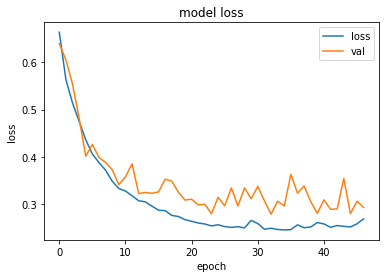

In [113]:
plt.plot(history_17.history['loss'])
plt.plot(history_17.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val'], loc='upper right')
plt.show()

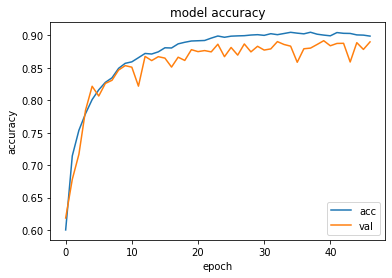

In [114]:
plt.plot(history_17.history['accuracy'])
plt.plot(history_17.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val',], loc='lower right')
plt.show()

In [115]:
trainaug=ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [116]:
train_newset=trainaug.flow_from_dataframe(
    x_train, 
    directory = train_file, 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [117]:
new_val=ImageDataGenerator(rescale=1./255)

In [118]:
val_newset=new_val.flow_from_dataframe(          val_set,
                                                 directory = train_file, 
                                                 x_col='filename',
                                                 y_col='category',
                                                 color_size='rgb',
                                                 target_size=(128,128),
                                                 class_mode='categorical',
                                                 batch_size=64                        )

Found 5000 validated image filenames belonging to 2 classes.


In [119]:
example_df = x_train.sample(n=1).reset_index(drop=True)
example_generator = trainaug.flow_from_dataframe(   
    example_df,   
    './train/', 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


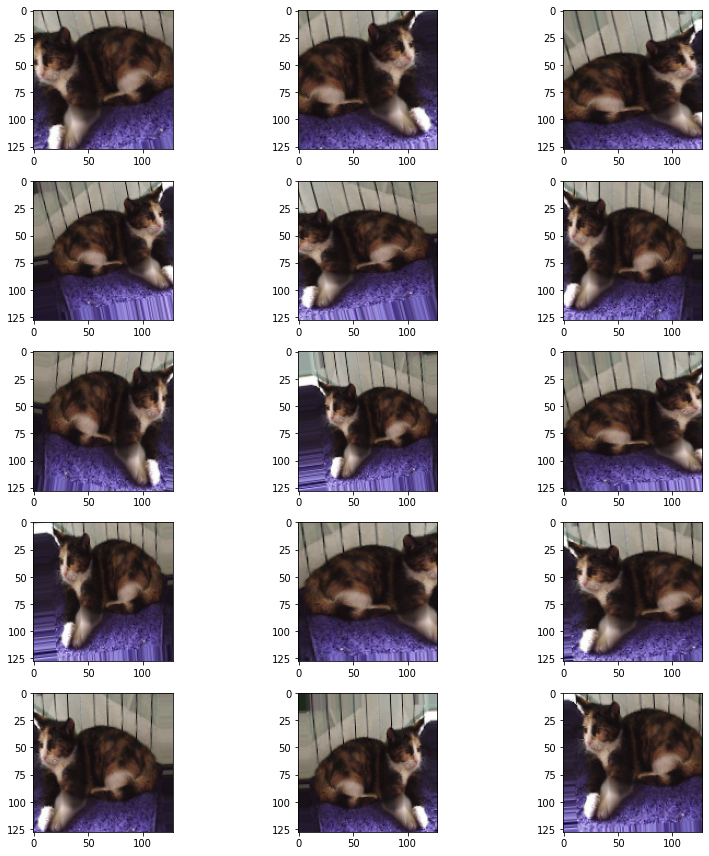

In [120]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [121]:
model_19=Sequential()

In [122]:
model_19.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model_19.add(MaxPooling2D(pool_size=(2,2)))
model_19.add(Dropout(0.25))
model_19.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
model_19.add(MaxPooling2D(pool_size=(2,2)))
model_19.add(Dropout(0.25))
model_19.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model_19.add(MaxPooling2D(pool_size=(2,2)))
model_19.add(Dropout(0.25))
model_19.add(Flatten())
model_19.add(Dense(128, activation='relu'))
model_19.add(Dropout(0.3))
model_19.add(Dense(128, activation='relu'))
model_19.add(Dropout(0.5))
model_19.add(Dense(2, activation='softmax'))

In [123]:
model_19.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 61, 61, 64)        73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)       

In [124]:
model_19.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [125]:
model_19.optimizer.lr=0.001

In [126]:
callback_2= EarlyStopping(monitor='val_loss',patience=14, restore_best_weights=True, verbose=1, mode='min')

In [127]:
history_19= model_19.fit(train_newset,
                batch_size=batch_size,
                epochs=epochs,
                shuffle=True,
                verbose=1,
                callbacks= callback_2, 
                validation_data=val_newset
                                       )

Epoch 1/60
313/313 [==============================] - 148s 472ms/step - loss: 0.6967 - accuracy: 0.5048 - val_loss: 0.6939 - val_accuracy: 0.4946
Epoch 2/60
313/313 [==============================] - 147s 469ms/step - loss: 0.6901 - accuracy: 0.5245 - val_loss: 0.6774 - val_accuracy: 0.5692
Epoch 3/60
313/313 [==============================] - 146s 467ms/step - loss: 0.6759 - accuracy: 0.5726 - val_loss: 0.6097 - val_accuracy: 0.6738
Epoch 4/60
313/313 [==============================] - 147s 468ms/step - loss: 0.6133 - accuracy: 0.6649 - val_loss: 0.5391 - val_accuracy: 0.7350
Epoch 5/60
313/313 [==============================] - 146s 466ms/step - loss: 0.5674 - accuracy: 0.7088 - val_loss: 0.5202 - val_accuracy: 0.7432
Epoch 6/60
313/313 [==============================] - 147s 468ms/step - loss: 0.5280 - accuracy: 0.7388 - val_loss: 0.4628 - val_accuracy: 0.7806
Epoch 7/60
313/313 [==============================] - 146s 467ms/step - loss: 0.5081 - accuracy: 0.7545 - val_loss: 0.4418 -

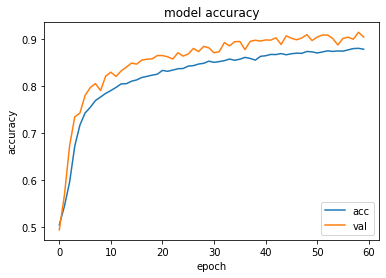

In [128]:
plt.plot(history_19.history['accuracy'])
plt.plot(history_19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val',], loc='lower right')
plt.show()

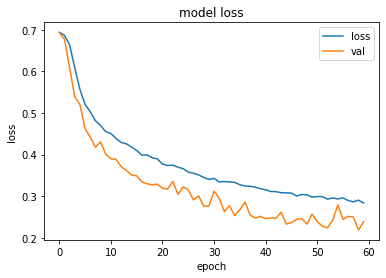

In [129]:
plt.plot(history_19.history['loss'])
plt.plot(history_19.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val'], loc='upper right')
plt.show()

In [130]:
# test_file = './test1'
# test_list = os.listdir(test_file)


test_data_files= pd.DataFrame({
    
    'filename': test_list
    
})


In [131]:
nb_samples =test_data_files.shape[0]

In [132]:
generate_test_data_files= ImageDataGenerator(rescale=1./255)
test_gen = generate_test_data_files.flow_from_dataframe(
    test_data_files, 
    './test1' , 
    x_col='filename',
    #y_col=None,
    color_size='rgb',
    class_mode=None,
    target_size=(128,128),
    batch_size=64,
    shuffle=False
)

Found 12500 validated image filenames.


In [133]:
predict = model_19.predict_generator(test_gen, steps=np.ceil(nb_samples/batch_size))

In [134]:
test_data_files['category'] = np.argmax(predict, axis=-1)

In [135]:
label_map = dict((v,k) for k,v in train_newset.class_indices.items())
test_data_files['category'] = test_data_files['category'].replace(label_map)

In [136]:
test_data_files['category'] = test_data_files['category'].replace({ 'dog': 1, 'cat': 0 })

In [137]:
submission_df = test_data_files.copy()
submission_df['fn'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']



In [138]:
submission_df.drop(['filename', 'category'], axis=1, inplace=True)

In [139]:
print (submission_df)

          fn  label
0       4971      1
1      12476      1
2       5464      1
3      12109      1
4       2259      1
...      ...    ...
12495   2389      1
12496   9558      0
12497   7887      0
12498   8869      1
12499   9299      0

[12500 rows x 2 columns]


In [140]:
data_frame_sub= pd.DataFrame({
    
    'fn': test_list,
    'label' : test_data_files['category']
    
})

In [141]:
data_frame_sub.head(10000)

,fn,label
0,4971.jpg,1
1,12476.jpg,1
2,5464.jpg,1
3,12109.jpg,1
4,2259.jpg,1
...,...,...
9995,3485.jpg,1
9996,9008.jpg,0
9997,847.jpg,0
9998,7775.jpg,1


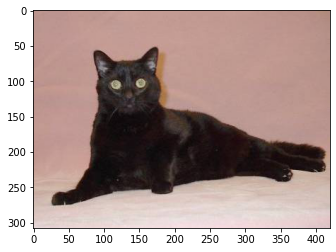

In [142]:
img_sub = load_img(test_file +  '/7038.jpg')
plt.imshow(img_sub)

In [143]:
img_test = data_frame_sub.head(25)
img_test.head(25)

,fn,label
0,4971.jpg,1
1,12476.jpg,1
2,5464.jpg,1
3,12109.jpg,1
4,2259.jpg,1
5,8840.jpg,0
6,9727.jpg,0
7,1998.jpg,1
8,2007.jpg,1
9,9735.jpg,0


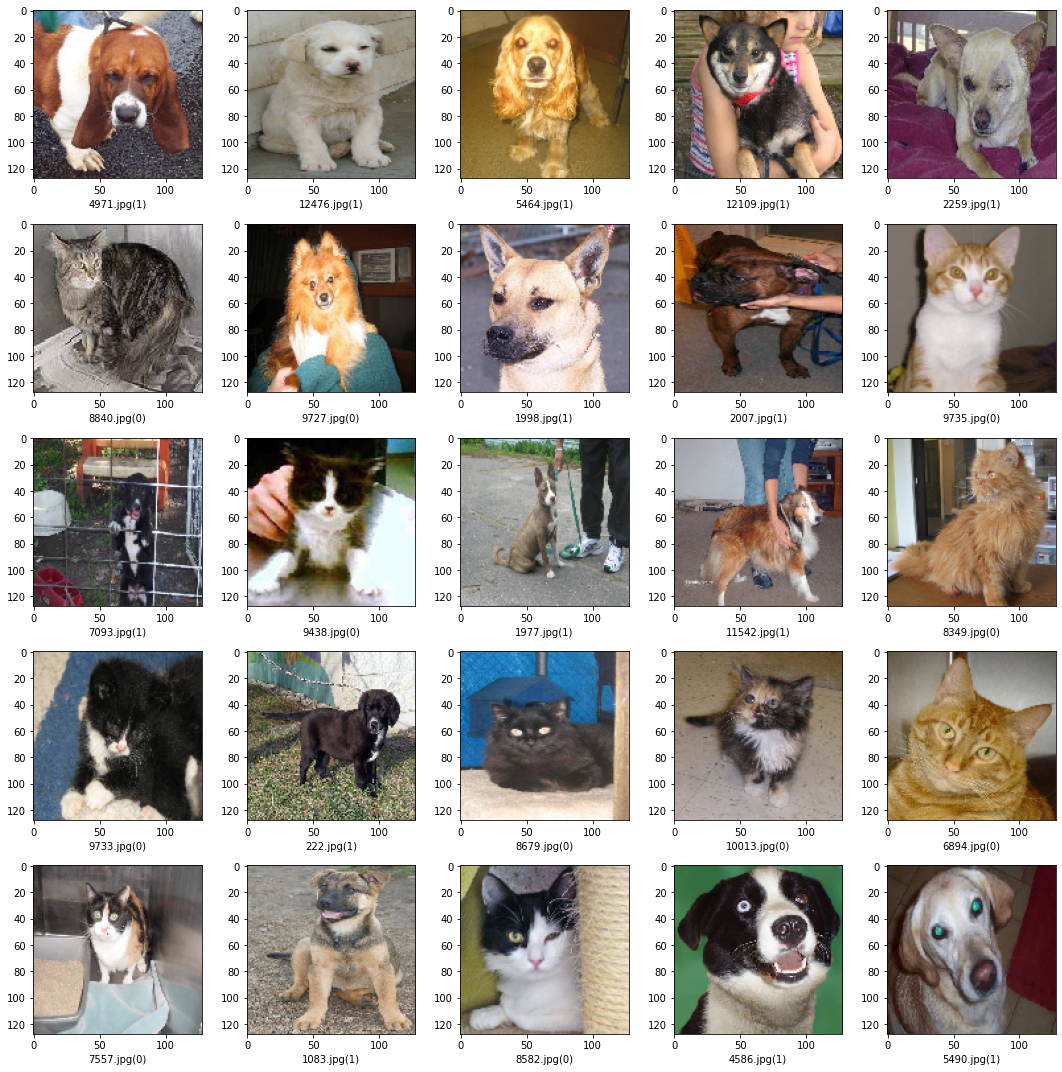

In [144]:
plt.figure(figsize=(15,15))

for index, row in img_test.iterrows():
    fn = row['fn']
    label = row['label']
    test_img= load_img('./test1/'+ fn, target_size=(128,128))
    plt.subplot(5,5,index+1)
    plt.imshow(test_img)
    plt.xlabel(fn + '(' + "{}".format(label) + ')' )
    
plt.tight_layout()
plt.show()    
    
 
